In [6]:
import helpers as hp
import pandas as pd
import matplotlib.pyplot as plt
from itertools import groupby
from pylab import rcParams, figure, text, scatter, show
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import operator

# # present all output per block and not just the last line
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# show plots in notebook
%matplotlib inline

# library settings
plt.style.use('seaborn-talk')

# set figure size
rcParams['figure.figsize'] = 10, 5

 ### 1. load raw data original from imdb

In [7]:
# operational modes + idle import from csv %%change to glob%%
df_c = pd.read_csv('data_compensator.csv', header=None)
df_cts = pd.read_csv('data_compensator_ts.csv', header=None)
df_g = pd.read_csv('data_generator.csv', header=None)
df_gts = pd.read_csv('data_generator_ts.csv', header=None)
df_p = pd.read_csv('data_pump.csv', header=None)
df_pts = pd.read_csv('data_pump_ts.csv', header=None)
df_i = pd.read_csv('data_Idle.csv', header=None)
df_its = pd.read_csv('data_Idle_ts.csv', header=None)
df_gdconnect = pd.read_csv('data_gridDisconnect.csv', header=None)
df_gdconnectts = pd.read_csv('data_gridDisconnect_ts.csv', header=None)
df_quickSp = pd.read_csv('data_quickStop.csv', header=None)
df_quickSpts = pd.read_csv('data_quickStop_ts.csv', header=None)
df_urgencySp = pd.read_csv('data_urgencyStop.csv', header=None)
df_urgencySpts = pd.read_csv('data_urgencyStop_ts.csv', header=None)
df_emergencySp = pd.read_csv('data_emergencyStop.csv', header=None)
df_emergencySpts = pd.read_csv('data_emergencyStop_ts.csv', header=None)
df_normSpComp = pd.read_csv('data_normalStopCompensator.csv', header=None)
df_normSpCompts = pd.read_csv('data_normalStopCompensator_ts.csv', header=None)
df_normSpGen = pd.read_csv('data_normalStopGenerator.csv', header=None)
df_normSpGents = pd.read_csv('data_normalStopGenerator_ts.csv', header=None)
df_normalStopPump = pd.read_csv('data_normalStopPump.csv', header=None)
df_normalStopPumpts = pd.read_csv('data_normalStopPump_ts.csv', header=None)


# merge values with time-stamps 

# normSpCompensator
df_normSpCompensator = pd.concat([df_normSpComp, df_normSpCompts], axis=0)
df_normSpCompensator = df_normSpCompensator.transpose()
df_normSpCompensator.columns = ['value', 'time']
df_normSpCompensator['time'] = pd.to_datetime(df_normSpCompensator['time'], unit='ms')
df_normSpCompensator.set_index('time', inplace=True)

# normSpGenerator
df_normSpGenerator = pd.concat([df_normSpGen, df_normSpGents], axis=0)
df_normSpGenerator = df_normSpGenerator.transpose()
df_normSpGenerator.columns = ['value', 'time']
df_normSpGenerator['time'] = pd.to_datetime(df_normSpGenerator['time'], unit='ms')
df_normSpGenerator.set_index('time', inplace=True)

# normalStopPump
df_normSpPump = pd.concat([df_normalStopPump, df_normalStopPumpts], axis=0)
df_normSpPump = df_normSpPump.transpose()
df_normSpPump.columns = ['value', 'time']
df_normSpPump['time'] = pd.to_datetime(df_normSpPump['time'], unit='ms')
df_normSpPump.set_index('time', inplace=True)

# comp
df_comp = pd.concat([df_c, df_cts], axis=0)
# df_comp.head()
df_comp = df_comp.transpose()
df_comp.columns = ['value', 'time']
df_comp['time'] = pd.to_datetime(df_comp['time'], unit='ms')
df_comp.set_index('time', inplace=True)
# df_comp.head()

# gen
df_gen = pd.concat([df_g, df_gts], axis=0)
# df_gen.head()
df_gen = df_gen.transpose()
df_gen.columns = ['value', 'time']
df_gen['time'] = pd.to_datetime(df_gen['time'], unit='ms')
df_gen.set_index('time', inplace=True)
# df_gen.head()

# pump
df_pump = pd.concat([df_p, df_pts], axis=0)
# df_pump.head()
df_pump = df_pump.transpose()
df_pump.columns = ['value', 'time']
df_pump['time'] = pd.to_datetime(df_pump['time'], unit='ms')
df_pump.set_index('time', inplace=True)
# df_pump.head()

# idle
df_idle = pd.concat([df_i, df_its], axis=0)
# df_idle.head()
df_idle = df_idle.transpose()
df_idle.columns = ['value', 'time']
df_idle['time'] = pd.to_datetime(df_idle['time'], unit='ms')
df_idle.set_index('time', inplace=True)

# gridDisconnect
df_gridDisconnect = pd.concat([df_gdconnect, df_gdconnectts], axis=0)
df_gridDisconnect = df_gridDisconnect.transpose()
df_gridDisconnect.columns = ['value', 'time']
df_gridDisconnect['time'] = pd.to_datetime(df_gridDisconnect['time'], unit='ms')
df_gridDisconnect.set_index('time', inplace=True)

# quickStop
df_quickStop = pd.concat([df_quickSp, df_quickSpts], axis=0)
df_quickStop = df_quickStop.transpose()
df_quickStop.columns = ['value', 'time']
df_quickStop['time'] = pd.to_datetime(df_quickStop['time'], unit='ms')
df_quickStop.set_index('time', inplace=True)

# urgencyStop
df_urgencyStop = pd.concat([df_urgencySp, df_urgencySpts], axis=0)
df_urgencyStop = df_urgencyStop.transpose()
df_urgencyStop.columns = ['value', 'time']
df_urgencyStop['time'] = pd.to_datetime(df_urgencyStop['time'], unit='ms')
df_urgencyStop.set_index('time', inplace=True)

# emergencyStop
df_emergencyStop = pd.concat([df_emergencySp, df_emergencySpts], axis=0)
df_emergencyStop = df_emergencyStop.transpose()
df_emergencyStop.columns = ['value', 'time']
df_emergencyStop['time'] = pd.to_datetime(df_emergencyStop['time'], unit='ms')
df_emergencyStop.set_index('time', inplace=True)


### with function call

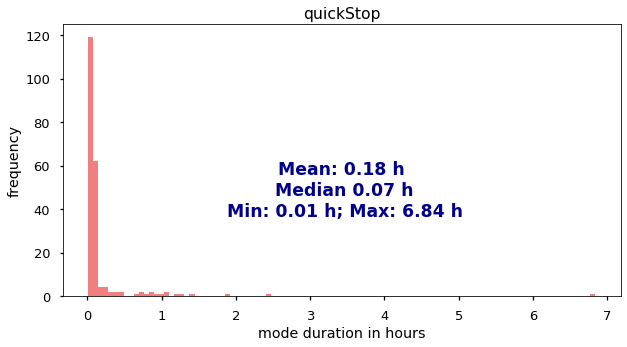

In [3]:
hp.len_raw_tags(df_quickStop, 'quickStop')

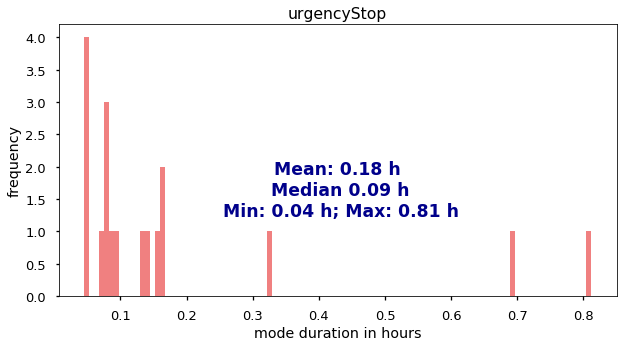

In [4]:
hp.len_raw_tags(df_urgencyStop, 'urgencyStop')

In [5]:
# hp.len_raw_tags(df_emergencyStop, 'emergencyStop') # probably empty

## Raw data review

In [9]:
machine_list = ['AGR500', 'Alternador_Frenagem_Mec', 'Alternador_Ventil_Temp', 
                'Chumaceira_Combinada', 'Chumaceira_Temperatura', 'Chumaceira_Turbina', 
                'Distribuidor_Ferrolhos', 'Esquema_Unifilar', 'Estacao_Ar_Comprimido', 
                'Excitacao_Reg_Tensao', 'Refrig_Junta_Estanque', 'Regulador_Velocidade', 
                'Restituicao', 'Sistema_Oleo_Reg', 'Tomada_Agua', 'Transformador_Grupo', 
                'Turbina', 'Valvula_Cilindrica']    

In [11]:
# GT for quick stop
begin, end = hp.get_event_timestamps(df_quickStop)

machine = np.repeat(machine_list, len(begin))
event_start = begin * len(machine_list)
event_end = end * len(machine_list)

groundTruth_qs = pd.DataFrame()
groundTruth_qs['machine'] = machine
groundTruth_qs['type'] = 'unplanned'
groundTruth_qs['event_start'] = event_start
groundTruth_qs['event_end'] = event_end

In [12]:
# GT for urgency stop
begin, end = hp.get_event_timestamps(df_urgencyStop)

machine = np.repeat(machine_list, len(begin))
event_start = begin * len(machine_list)
event_end = end * len(machine_list)

groundTruth_us = pd.DataFrame()
groundTruth_us['machine'] = machine
groundTruth_us['type'] = 'unplanned'
groundTruth_us['event_start'] = event_start
groundTruth_us['event_end'] = event_end

In [100]:
groundTruth = pd.concat([groundTruth_qs, groundTruth_us], ignore_index=True)

In [71]:
groundTruth.columns

Index(['machine', 'type', 'event_start', 'event_end'], dtype='object')

In [72]:
groundTruth.shape

(4122, 4)

In [73]:
groundTruth_qs.shape

(3798, 4)

In [86]:
groundTruth.head()

machine       type       event_start         event_end
0  AGR500  unplanned  25/01/2016 11:50  25/01/2016 11:55
1  AGR500  unplanned  05/02/2016 16:51  05/02/2016 16:57
2  AGR500  unplanned  20/02/2016 08:33  20/02/2016 08:40
3  AGR500  unplanned  23/02/2016 15:17  23/02/2016 15:25
4  AGR500  unplanned  24/02/2016 15:17  24/02/2016 15:22

In [101]:
groundTruth = groundTruth[groundTruth['event_start'] != groundTruth['event_end']]
groundTruth.to_csv('GT_qs_us.csv', index=False)

In [89]:
groundTruth[groundTruth['event_start'] != groundTruth['event_end']]

machine       type       event_start         event_end
0                 AGR500  unplanned  25/01/2016 11:50  25/01/2016 11:55
1                 AGR500  unplanned  05/02/2016 16:51  05/02/2016 16:57
2                 AGR500  unplanned  20/02/2016 08:33  20/02/2016 08:40
3                 AGR500  unplanned  23/02/2016 15:17  23/02/2016 15:25
4                 AGR500  unplanned  24/02/2016 15:17  24/02/2016 15:22
...                  ...        ...               ...               ...
4117  Valvula_Cilindrica  unplanned  15/01/2018 17:41  15/01/2018 17:44
4118  Valvula_Cilindrica  unplanned  27/02/2018 18:20  27/02/2018 18:24
4119  Valvula_Cilindrica  unplanned  23/12/2018 14:34  23/12/2018 14:39
4120  Valvula_Cilindrica  unplanned  28/12/2018 01:17  28/12/2018 01:21
4121  Valvula_Cilindrica  unplanned  21/10/2019 00:42  21/10/2019 00:48

[3852 rows x 4 columns]

In [94]:
pd.to_datetime(groundTruth['event_end'][0]) - pd.to_datetime(groundTruth['event_start'][0])

Timedelta('0 days 00:05:00')

In [95]:
groundTruth['time delta'] = pd.to_datetime(groundTruth['event_end']) - pd.to_datetime(groundTruth['event_start'])

In [96]:
groundTruth.head

<bound method NDFrame.head of                  machine       type       event_start         event_end  \
0                 AGR500  unplanned  25/01/2016 11:50  25/01/2016 11:55   
1                 AGR500  unplanned  05/02/2016 16:51  05/02/2016 16:57   
2                 AGR500  unplanned  20/02/2016 08:33  20/02/2016 08:40   
3                 AGR500  unplanned  23/02/2016 15:17  23/02/2016 15:25   
4                 AGR500  unplanned  24/02/2016 15:17  24/02/2016 15:22   
...                  ...        ...               ...               ...   
4117  Valvula_Cilindrica  unplanned  15/01/2018 17:41  15/01/2018 17:44   
4118  Valvula_Cilindrica  unplanned  27/02/2018 18:20  27/02/2018 18:24   
4119  Valvula_Cilindrica  unplanned  23/12/2018 14:34  23/12/2018 14:39   
4120  Valvula_Cilindrica  unplanned  28/12/2018 01:17  28/12/2018 01:21   
4121  Valvula_Cilindrica  unplanned  21/10/2019 00:42  21/10/2019 00:48   

     time delta  
0      00:05:00  
1      00:06:00  
2      00:07:00

In [ ]:
# separate runs for quick and urgent stops

groundTruth = groundTruth[groundTruth['event_start'] != groundTruth['event_end']]
groundTruth.to_csv('GT_qs_us.csv', index=False)